In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
active_repos = [
    # 2019
    2611644, 2606446, 2977006, 2923531, 2928444, 2747810, 2865740, 2832869, 2948599, 3366565, 3151836, 3005339,
    # 2020
    3112743, 3212295, 3652348, 3924648, 4024904, 3770460, 3891180, 3624909, 3932372, 4270893, 3929484, 3931157,
    # 2021
    4081612, 3925755, 4329131, 4336548, 4058366, 4272619, 4499374, 4784067, 4325393, 3004922, 4486062, 4416160,
    # 2022
    4729303, 4561140, 5053435, 4954260, 5050879, 4977946, 4899357, 5206425, 5588289, 6304810, 5628455, 5251805
]

In [3]:
df = pd.DataFrame({
    "Date": pd.date_range(start="2019-01-01", end="2022-12-31", freq="M"),
    "Active_repos": active_repos
})

In [4]:
df

,Date,Active_repos
0,2019-01-31,2611644
1,2019-02-28,2606446
2,2019-03-31,2977006
3,2019-04-30,2923531
4,2019-05-31,2928444
5,2019-06-30,2747810
6,2019-07-31,2865740
7,2019-08-31,2832869
8,2019-09-30,2948599
9,2019-10-31,3366565


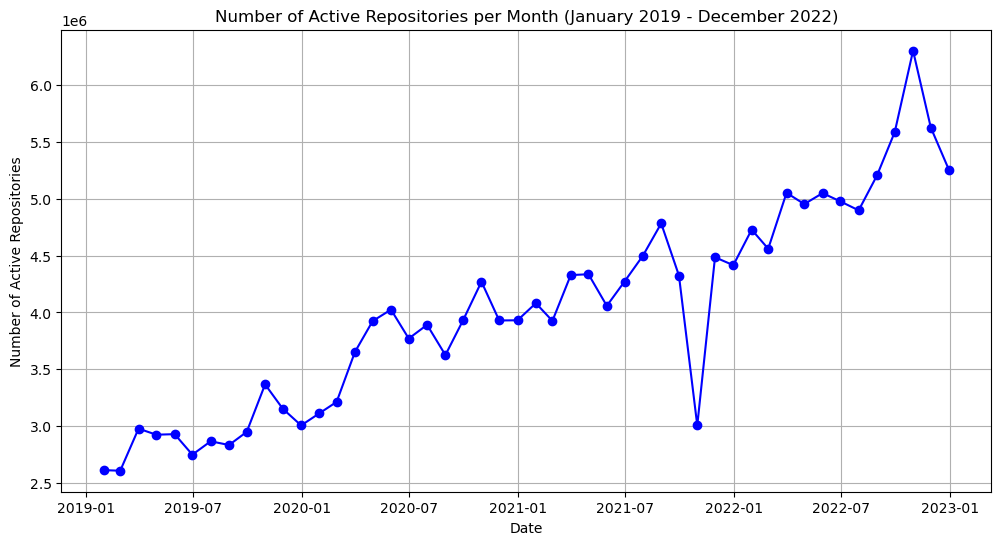

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Active_repos'], marker='o', linestyle='-', color='b')
plt.title("Number of Active Repositories per Month (January 2019 - December 2022)")
plt.xlabel("Date")
plt.ylabel("Number of Active Repositories")
plt.grid(True)
plt.show()

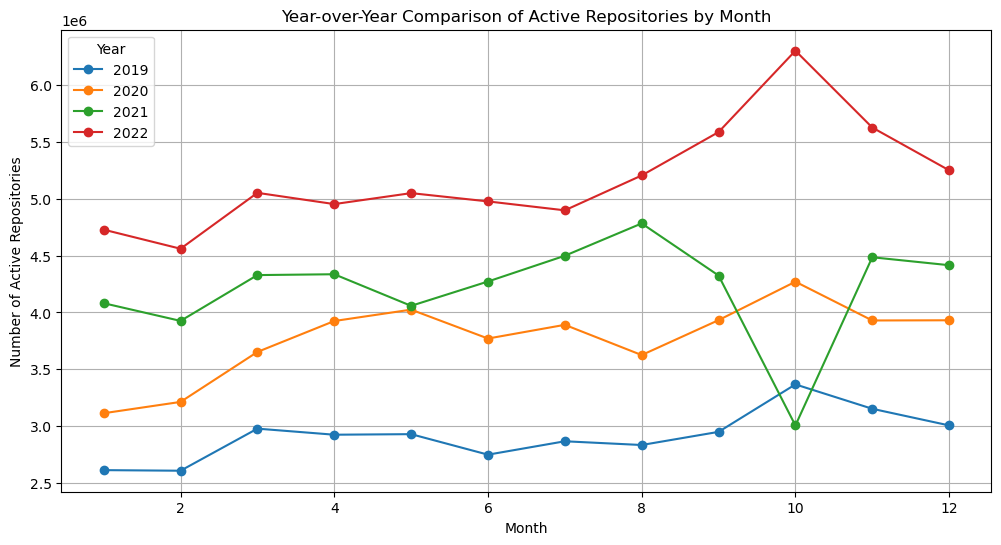

In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
monthly_totals = df.groupby(['Year', 'Month'])['Active_repos'].sum().unstack(level=0)
monthly_totals.plot(figsize=(12, 6), marker='o')
plt.title("Year-over-Year Comparison of Active Repositories by Month")
plt.xlabel("Month")
plt.ylabel("Number of Active Repositories")
plt.grid(True)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
df['Time'] = np.arange(len(df))
X_pre = df[df['Date'] < '2020-01-01'][['Time']]
y_pre = df[df['Date'] < '2020-01-01']['Active_repos']
X_post = df[df['Date'] >= '2020-01-01'][['Time']]
y_post = df[df['Date'] >= '2020-01-01']['Active_repos']

In [9]:
model_pre = LinearRegression().fit(X_pre, y_pre)
model_post = LinearRegression().fit(X_post, y_post)

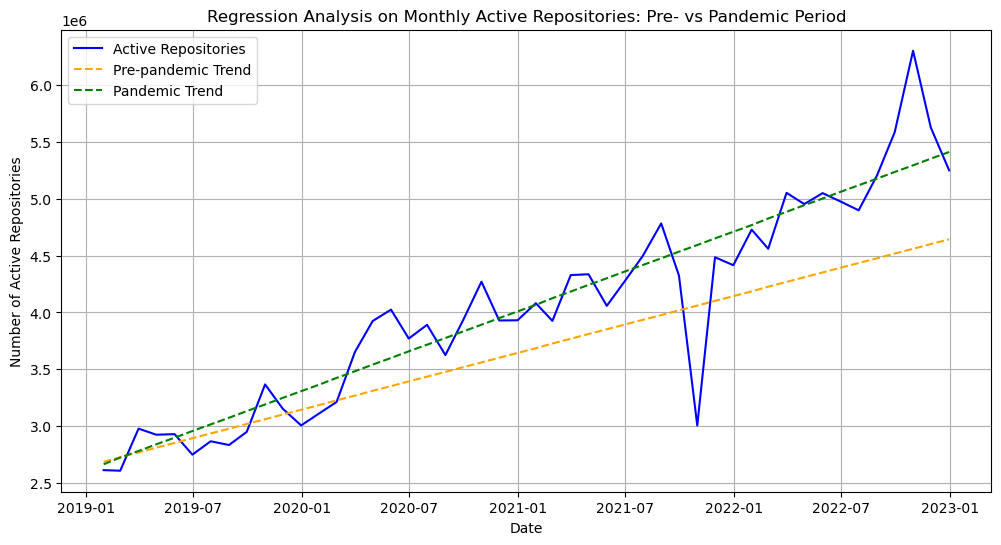

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Active_repos'], label='Active Repositories', color='b')
plt.plot(df['Date'], model_pre.predict(df[['Time']]), label='Pre-pandemic Trend', linestyle='--', color='orange')
plt.plot(df['Date'], model_post.predict(df[['Time']]), label='Pandemic Trend', linestyle='--', color='green')
plt.title("Regression Analysis on Monthly Active Repositories: Pre- vs Pandemic Period")
plt.xlabel("Date")
plt.ylabel("Number of Active Repositories")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df.head()

,Date,Active_repos,Year,Month,Time
0,2019-01-31,2611644,2019,1,0
1,2019-02-28,2606446,2019,2,1
2,2019-03-31,2977006,2019,3,2
3,2019-04-30,2923531,2019,4,3
4,2019-05-31,2928444,2019,5,4
